# Investigating data of "Air Passanger Satisfaction" to predict future business of airlines

In [136]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.colors import LinearSegmentedColormap
import seaborn as sns

# Load the dataset
df = pd.read_csv('airline_passenger_satisfaction.csv')

In [133]:
#Viewing dataset
pd.DataFrame.head(df)

,ID,Gender,Age,Customer Type,Type of Travel,Class,Flight Distance,Departure Delay,Arrival Delay,Departure and Arrival Time Convenience,...,On-board Service,Seat Comfort,Leg Room Service,Cleanliness,Food and Drink,In-flight Service,In-flight Wifi Service,In-flight Entertainment,Baggage Handling,Satisfaction
0,1,Male,48,First-time,Business,Business,821.0,2.0,5.0,3,...,3.0,5.0,2.0,5.0,5,5.0,3.0,5.0,5,Neutral or Dissatisfied
1,2,Female,35,Returning,Business,Business,821.0,26.0,39.0,2,...,5.0,4.0,5.0,5.0,3,5.0,2.0,5.0,5,Satisfied
2,3,Male,41,Returning,Business,Business,853.0,0.0,0.0,4,...,3.0,5.0,3.0,5.0,5,3.0,4.0,3.0,3,Satisfied
3,4,Male,50,Returning,Business,Business,1905.0,0.0,0.0,2,...,5.0,5.0,5.0,4.0,4,5.0,2.0,5.0,5,Satisfied
4,5,Female,49,Returning,Business,Business,3470.0,0.0,1.0,3,...,3.0,4.0,4.0,5.0,4,3.0,3.0,3.0,3,Satisfied


In [77]:
#Viewing dataset
pd.DataFrame.tail(df)

,ID,Gender,Age,Customer Type,Type of Travel,Class,Flight Distance,Departure Delay,Arrival Delay,Departure and Arrival Time Convenience,...,On-board Service,Seat Comfort,Leg Room Service,Cleanliness,Food and Drink,In-flight Service,In-flight Wifi Service,In-flight Entertainment,Baggage Handling,Satisfaction
129875,129876,Male,28,Returning,Personal,Economy Plus,NaN,2.0,3.0,4,...,5.0,1.0,NaN,4.0,4,5.0,NaN,4.0,4,Neutral or Dissatisfied
129876,129877,Male,41,Returning,Personal,Economy Plus,308.0,0.0,0.0,5,...,5.0,2.0,5.0,2.0,2,4.0,3.0,2.0,5,Neutral or Dissatisfied
129877,129878,Male,42,Returning,Personal,Economy Plus,337.0,6.0,14.0,5,...,3.0,3.0,4.0,3.0,3,4.0,2.0,3.0,5,Neutral or Dissatisfied
129878,129879,Male,50,Returning,Personal,Economy Plus,337.0,31.0,22.0,4,...,4.0,4.0,5.0,3.0,3,4.0,5.0,3.0,5,Satisfied
129879,129880,Female,20,Returning,Personal,Economy Plus,337.0,0.0,0.0,1,...,4.0,2.0,4.0,2.0,2,2.0,3.0,2.0,1,Neutral or Dissatisfied


In [119]:
#Checking datatypes
df.dtypes

ID                                          int64
Gender                                     object
Age                                         int64
Customer Type                              object
Type of Travel                             object
Class                                      object
Flight Distance                           float64
Departure Delay                           float64
Arrival Delay                             float64
Departure and Arrival Time Convenience      int64
Ease of Online Booking                    float64
Check-in Service                          float64
Online Boarding                           float64
Gate Location                               int64
On-board Service                          float64
Seat Comfort                              float64
Leg Room Service                          float64
Cleanliness                               float64
Food and Drink                              int64
In-flight Service                         float64


In [79]:
print(df.columns)

Index(['ID', 'Gender', 'Age', 'Customer Type', 'Type of Travel', 'Class',
       'Flight Distance', 'Departure Delay', 'Arrival Delay',
       'Departure and Arrival Time Convenience', 'Ease of Online Booking',
       'Check-in Service', 'Online Boarding', 'Gate Location',
       'On-board Service', 'Seat Comfort', 'Leg Room Service', 'Cleanliness',
       'Food and Drink', 'In-flight Service', 'In-flight Wifi Service',
       'In-flight Entertainment', 'Baggage Handling', 'Satisfaction'],
      dtype='object')


In [80]:
print(df['ID'])

0              1
1              2
2              3
3              4
4              5
           ...  
129875    129876
129876    129877
129877    129878
129878    129879
129879    129880
Name: ID, Length: 129880, dtype: int64


In [81]:
print(df['Type of Travel'])

0         Business
1         Business
2         Business
3         Business
4         Business
            ...   
129875    Personal
129876    Personal
129877    Personal
129878    Personal
129879    Personal
Name: Type of Travel, Length: 129880, dtype: object


In [82]:
df.shape

(129880, 24)

In [83]:
# Calculate summary statistics
summary_stats = df.describe()
summary_stats

,ID,Age,Flight Distance,Departure Delay,Arrival Delay,Departure and Arrival Time Convenience,Ease of Online Booking,Check-in Service,Online Boarding,Gate Location,On-board Service,Seat Comfort,Leg Room Service,Cleanliness,Food and Drink,In-flight Service,In-flight Wifi Service,In-flight Entertainment,Baggage Handling
count,129880.000000,129880.000000,129879.000000,129879.000000,129486.000000,129880.000000,129875.000000,129878.000000,129878.000000,129880.000000,129878.000000,129879.000000,129877.000000,129879.000000,129880.000000,129879.000000,129879.000000,129879.000000,129880.000000
mean,64940.500000,39.427957,1190.322115,14.713826,15.091245,3.057599,2.756835,3.306272,3.252629,2.976925,3.383044,3.441357,3.350878,3.286320,3.204774,3.642190,2.728686,3.358072,3.632114
std,37493.270818,15.119360,997.454185,38.071251,38.465776,1.526741,1.401733,1.266170,1.350727,1.278520,1.287092,1.319293,1.316265,1.313686,1.329933,1.176673,1.329341,1.334053,1.180025
min,1.000000,7.000000,31.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,32470.750000,27.000000,414.000000,0.000000,0.000000,2.000000,2.000000,3.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,3.000000,2.000000,2.000000,3.000000
50%,64940.500000,40.000000,844.000000,0.000000,0.000000,3.000000,3.000000,3.000000,3.000000,3.000000,4.000000,4.000000,4.000000,3.000000,3.000000,4.000000,3.000000,4.000000,4.000000
75%,97410.250000,51.000000,1744.000000,12.000000,13.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,5.000000,4.000000,4.000000,4.000000,5.000000,4.000000,4.000000,5.000000
max,129880.000000,85.000000,4983.000000,1592.000000,1584.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000


# Data Cleaning

In [127]:
# Check for missing values
print("Missing values before cleaning:")
print(df.isnull().sum())

Missing values before cleaning:
ID                                        0
Gender                                    0
Age                                       0
Customer Type                             0
Type of Travel                            0
Class                                     0
Flight Distance                           0
Departure Delay                           0
Arrival Delay                             0
Departure and Arrival Time Convenience    0
Ease of Online Booking                    0
Check-in Service                          0
Online Boarding                           0
Gate Location                             0
On-board Service                          0
Seat Comfort                              0
Leg Room Service                          0
Cleanliness                               0
Food and Drink                            0
In-flight Service                         0
In-flight Wifi Service                    0
In-flight Entertainment                   0


# DATA TRANFOMATION

In [134]:
# Drop rows with missing values
df.dropna(inplace=True)

In [137]:
# Convert categorical variables to appropriate data types
categorical_cols = ['Gender', 'Customer Type', 'Type of Travel', 'Class', 'Satisfaction']
for col in categorical_cols:
    df[col] = df[col].astype('category')

# Convert 'Departure and Arrival Time Convenience' and 'Ease of Online Booking' to categorical variables
def convert_to_categorical(value):
    if value <= 2:
        return 'Low'
    elif value <= 4:
        return 'Medium'
    else:
        return 'High'

df['Departure and Arrival Time Convenience'] = df['Departure and Arrival Time Convenience'].apply(convert_to_categorical)
df['Ease of Online Booking'] = df['Ease of Online Booking'].apply(convert_to_categorical)

# Convert 'Departure Delay' and 'Arrival Delay' to positive values
df['Departure Delay'] = df['Departure Delay'].abs()
df['Arrival Delay'] = df['Arrival Delay'].abs()


# Display the transformed dataset
print(df.head())

   ID  Gender  Age Customer Type Type of Travel     Class  Flight Distance  \
0   1    Male   48    First-time       Business  Business            821.0   
1   2  Female   35     Returning       Business  Business            821.0   
2   3    Male   41     Returning       Business  Business            853.0   
3   4    Male   50     Returning       Business  Business           1905.0   
4   5  Female   49     Returning       Business  Business           3470.0   

   Departure Delay  Arrival Delay Departure and Arrival Time Convenience  ...  \
0              2.0            5.0                                 Medium  ...   
1             26.0           39.0                                    Low  ...   
2              0.0            0.0                                 Medium  ...   
3              0.0            0.0                                    Low  ...   
4              0.0            1.0                                 Medium  ...   

  On-board Service  Seat Comfort  Leg Room S

# EDA

In [114]:
# Descriptive statistics for repeating airline passengers
repeating_customers = df[df['Customer Type'] == 'Returning']

profile_stats = repeating_customers.describe(include='all')
print(profile_stats)


                   ID  Gender            Age Customer Type Type of Travel  \
count   105764.000000  105764  105764.000000        105764         105764   
unique            NaN       2            NaN             1              2   
top               NaN  Female            NaN     Returning       Business   
freq              NaN   52896            NaN        105764          65926   
mean     64933.512017     NaN      41.463731           NaN            NaN   
std      37468.808286     NaN      15.135168           NaN            NaN   
min          2.000000     NaN       7.000000           NaN            NaN   
25%      32510.750000     NaN      31.000000           NaN            NaN   
50%      65033.500000     NaN      43.000000           NaN            NaN   
75%      97329.250000     NaN      53.000000           NaN            NaN   
max     129880.000000     NaN      85.000000           NaN            NaN   

           Class  Flight Distance  Departure Delay  Arrival Delay  \
count 

In [60]:
# Descriptive statistics for repeating airline passengers
repeating_customers = df[df['Customer Type'] == 'Returning']

profile_stats = repeating_customers.describe(include='all')
print(profile_stats)


                   ID  Gender            Age Customer Type Type of Travel  \
count   105764.000000  105764  105764.000000        105764         105764   
unique            NaN       2            NaN             1              2   
top               NaN  Female            NaN     Returning       Business   
freq              NaN   52896            NaN        105764          65926   
mean     64933.512017     NaN      41.463731           NaN            NaN   
std      37468.808286     NaN      15.135168           NaN            NaN   
min          2.000000     NaN       7.000000           NaN            NaN   
25%      32510.750000     NaN      31.000000           NaN            NaN   
50%      65033.500000     NaN      43.000000           NaN            NaN   
75%      97329.250000     NaN      53.000000           NaN            NaN   
max     129880.000000     NaN      85.000000           NaN            NaN   

           Class  Flight Distance  Departure Delay  Arrival Delay  \
count 

In [91]:
# Descriptive statistics for repeating airline passengers
repeating_customers = df[df['Customer Type'] == 'Returning']

profile_stats = repeating_customers.describe(include='all')
print(profile_stats)


                   ID  Gender            Age Customer Type Type of Travel  \
count   105764.000000  105764  105764.000000        105764         105764   
unique            NaN       2            NaN             1              2   
top               NaN  Female            NaN     Returning       Business   
freq              NaN   52896            NaN        105764          65926   
mean     64933.512017     NaN      41.463731           NaN            NaN   
std      37468.808286     NaN      15.135168           NaN            NaN   
min          2.000000     NaN       7.000000           NaN            NaN   
25%      32510.750000     NaN      31.000000           NaN            NaN   
50%      65033.500000     NaN      43.000000           NaN            NaN   
75%      97329.250000     NaN      53.000000           NaN            NaN   
max     129880.000000     NaN      85.000000           NaN            NaN   

           Class  Flight Distance  Departure Delay  Arrival Delay  \
count 

In [63]:
# Descriptive statistics for repeating airline passengers
repeating_customers = df[df['Customer Type'] == 'Returning']

profile_stats = repeating_customers.describe(include='all')
print(profile_stats)



                   ID  Gender            Age Customer Type Type of Travel  \
count   105764.000000  105764  105764.000000        105764         105764   
unique            NaN       2            NaN             1              2   
top               NaN  Female            NaN     Returning       Business   
freq              NaN   52896            NaN        105764          65926   
mean     64933.512017     NaN      41.463731           NaN            NaN   
std      37468.808286     NaN      15.135168           NaN            NaN   
min          2.000000     NaN       7.000000           NaN            NaN   
25%      32510.750000     NaN      31.000000           NaN            NaN   
50%      65033.500000     NaN      43.000000           NaN            NaN   
75%      97329.250000     NaN      53.000000           NaN            NaN   
max     129880.000000     NaN      85.000000           NaN            NaN   

           Class  Flight Distance  Departure Delay  Arrival Delay  \
count 

Percentage of satisfied passengers: 43.45%
Satisfaction   Neutral or Dissatisfied  Satisfied
Customer Type                                    
First-time                   76.014169  23.985831
Returning                    52.184108  47.815892
Satisfaction    Neutral or Dissatisfied  Satisfied
Type of Travel                                    
Business                      41.631914  58.368086
Personal                      89.871869  10.128131


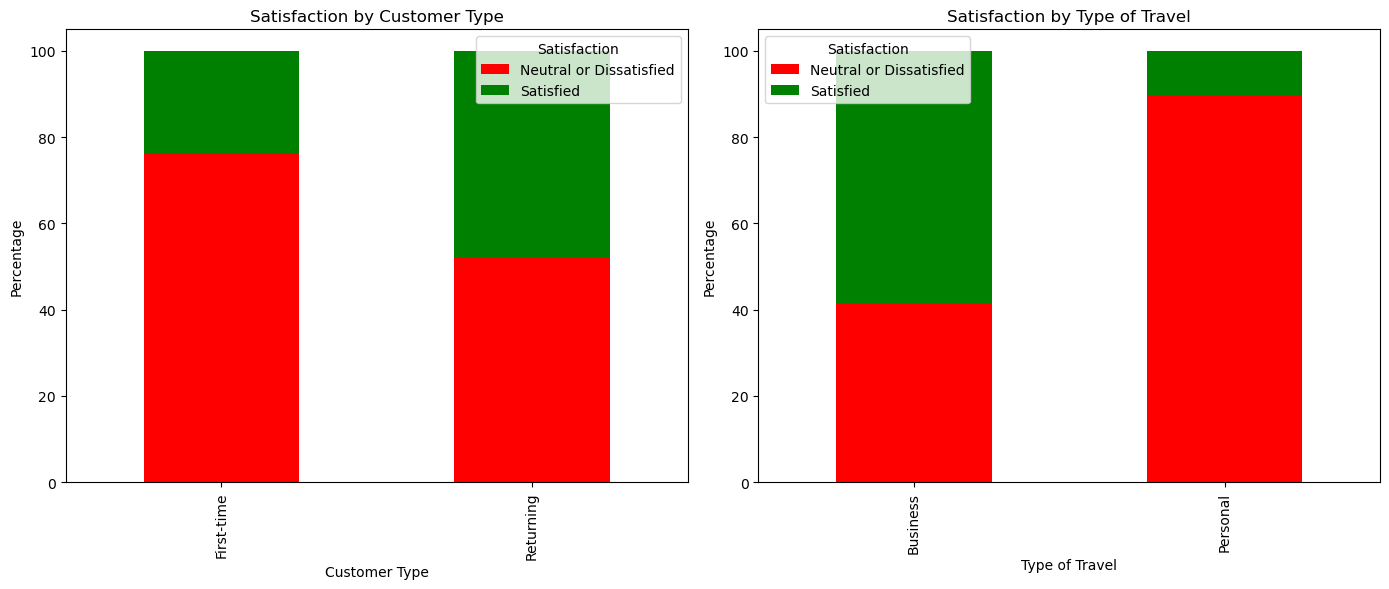

In [98]:
# Satisfied Percentage
total_passengers = df.shape[0]
satisfied_passengers = df[df['Satisfaction'] == 'Satisfied'].shape[0]
satisfied_percentage = (satisfied_passengers / total_passengers) * 100
print(f"Percentage of satisfied passengers: {satisfied_percentage:.2f}%")

# Satisfaction by Customer Type
satisfaction_by_customer_type = df.groupby('Customer Type')['Satisfaction'].value_counts(normalize=True).unstack() * 100
print(satisfaction_by_customer_type)

# Satisfaction by Type of Travel
satisfaction_by_travel_type = df.groupby('Type of Travel')['Satisfaction'].value_counts(normalize=True).unstack() * 100
print(satisfaction_by_travel_type)

# Plotting
plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
satisfaction_by_customer_type.plot(kind='bar', stacked=True, color=['red', 'green'], ax=plt.gca())
plt.title('Satisfaction by Customer Type')
plt.ylabel('Percentage')
plt.legend(title='Satisfaction')

plt.subplot(1, 2, 2)
satisfaction_by_travel_type.plot(kind='bar', stacked=True, color=['red', 'green'], ax=plt.gca())
plt.title('Satisfaction by Type of Travel')
plt.ylabel('Percentage')
plt.legend(title='Satisfaction')

plt.tight_layout()
plt.show()

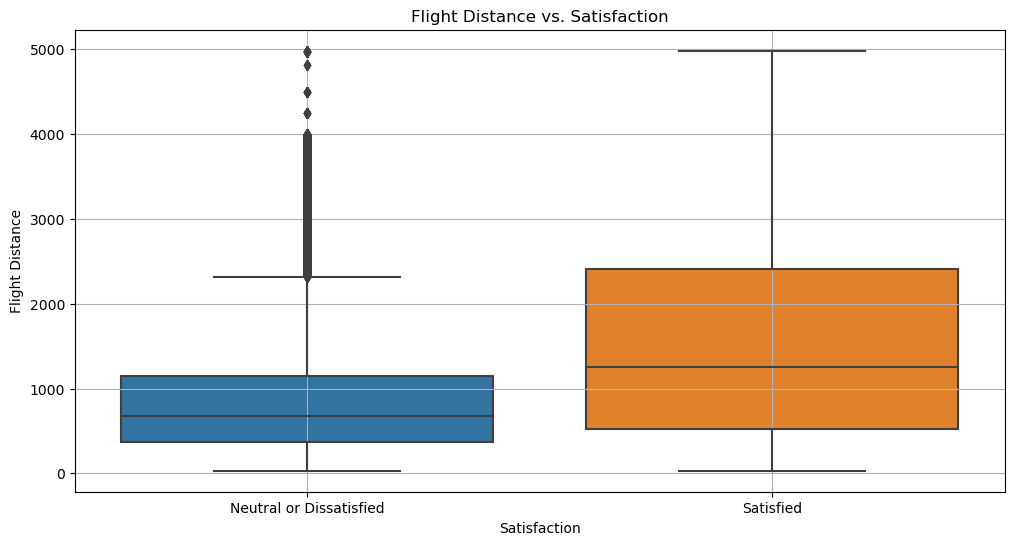

In [92]:
# Scatterplot: Flight Distance vs. Satisfaction
plt.figure(figsize=(12, 6))
sns.boxplot(x='Satisfaction', y='Flight Distance', data=df)
plt.title('Flight Distance vs. Satisfaction')
plt.xlabel('Satisfaction')
plt.ylabel('Flight Distance')
plt.grid(True)
plt.show()


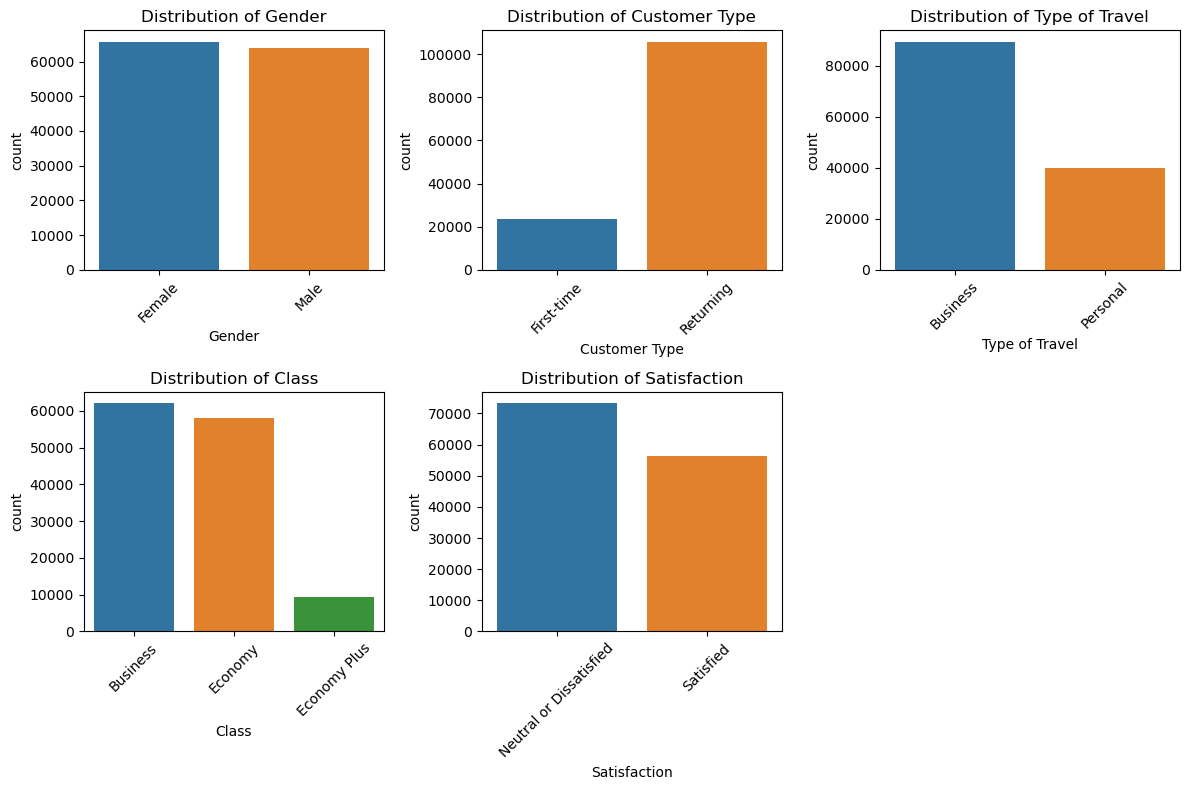

In [93]:
#Distribution of categorical variables
plt.figure(figsize=(12, 8))
for i, col in enumerate(categorical_cols, 1):
    plt.subplot(2, 3, i)
    sns.countplot(data=df, x=col)
    plt.title(f'Distribution of {col}')
    plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


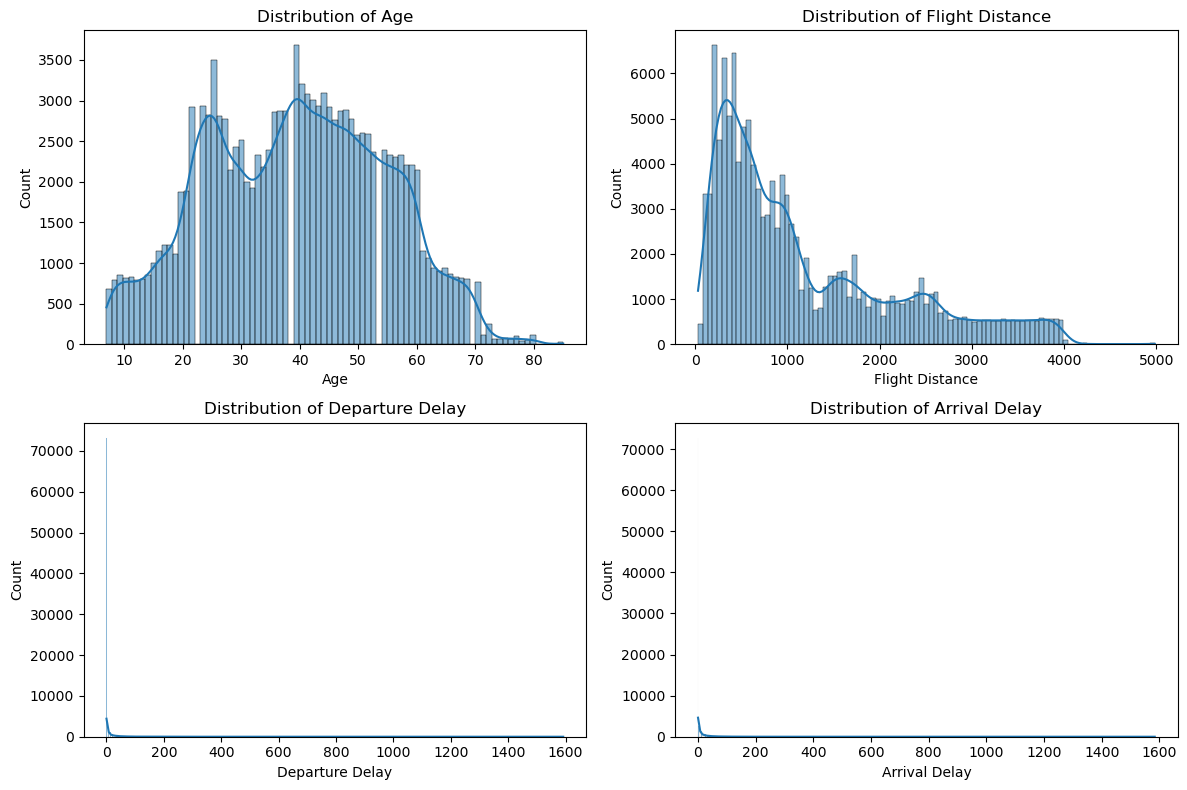

In [94]:
# Distribution of numerical variables
plt.figure(figsize=(12, 8))
numerical_cols = ['Age', 'Flight Distance', 'Departure Delay', 'Arrival Delay']
for i, col in enumerate(numerical_cols, 1):
    plt.subplot(2, 2, i)
    sns.histplot(data=df, x=col, kde=True)
    plt.title(f'Distribution of {col}')
plt.tight_layout()
plt.show()


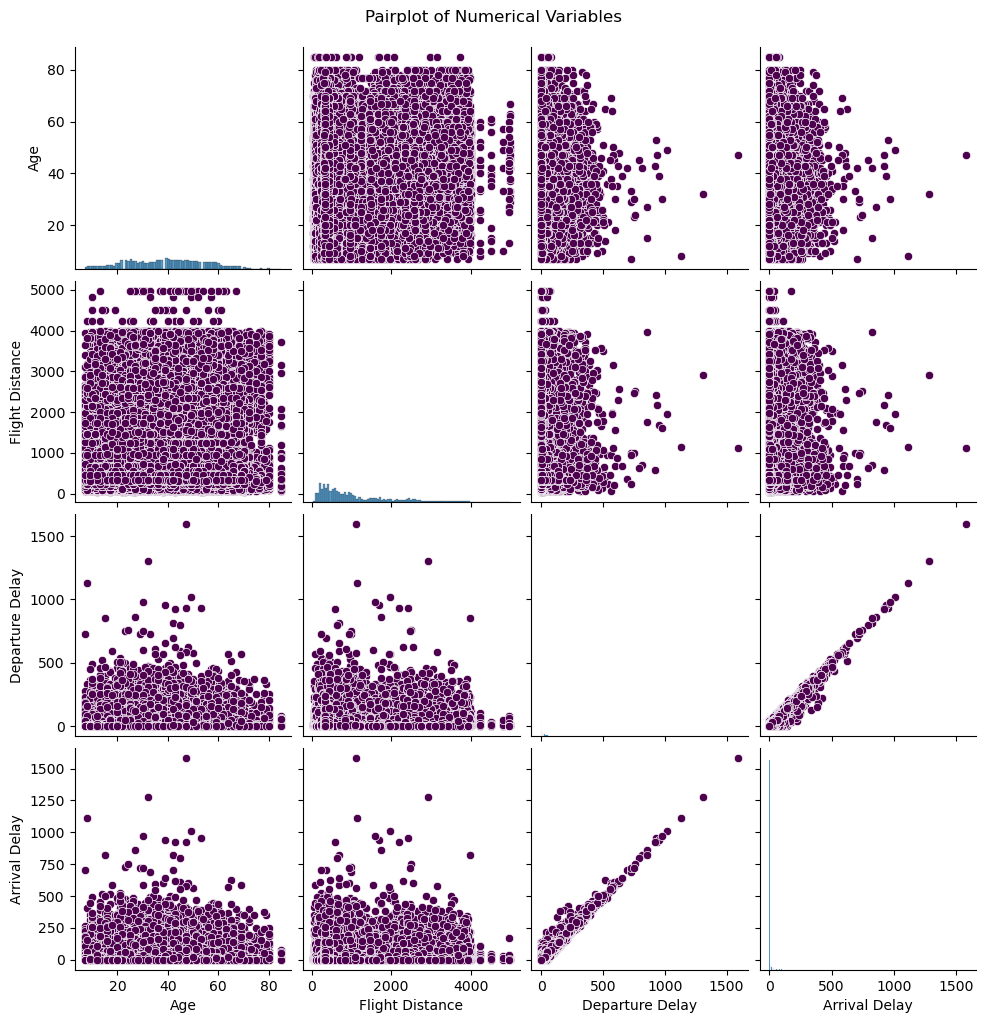

In [96]:
# Pairplot to visualize relationships between numerical variables
pairplot = sns.pairplot(df[numerical_cols])

for ax in pairplot.axes.flatten():
    for x in ax.collections:
        x.set_facecolor('#4d004d')

plt.suptitle('Pairplot of Numerical Variables', y=1.02)
plt.show()

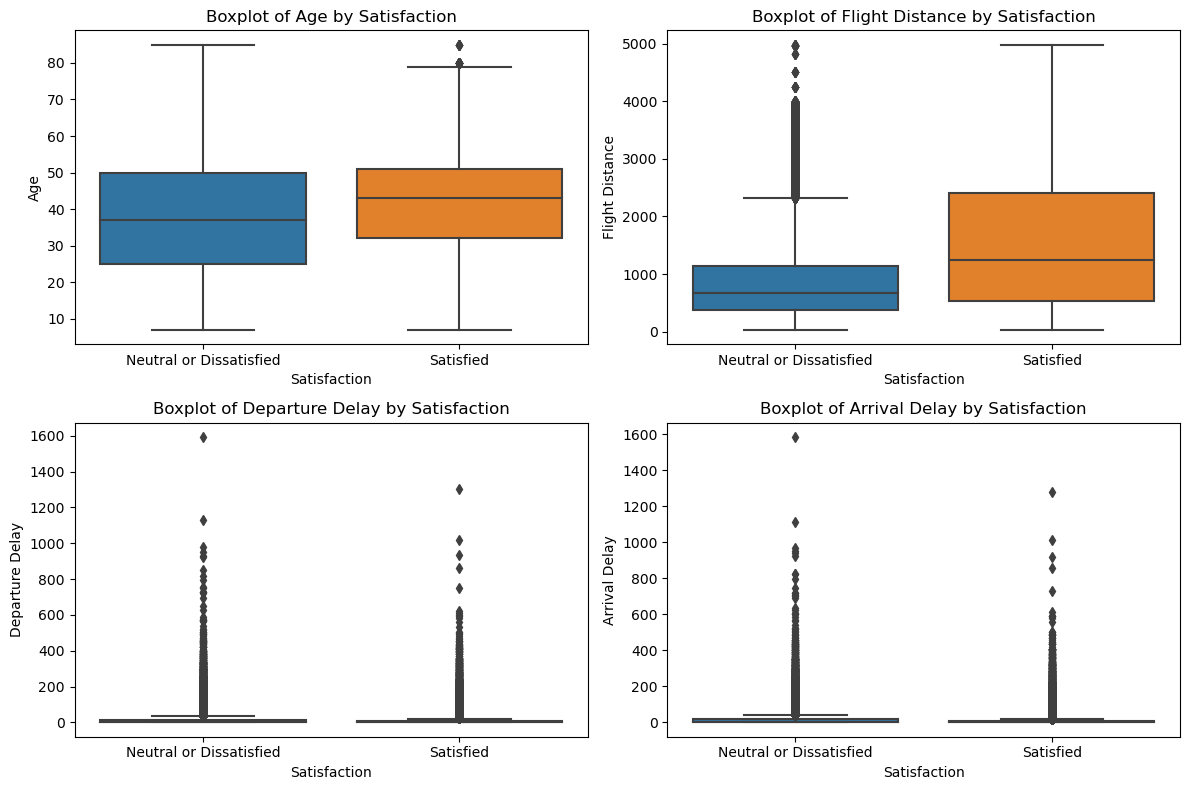

In [97]:
# Boxplot of numerical variables by satisfaction
plt.figure(figsize=(12, 8))
for i, col in enumerate(numerical_cols, 1):
    plt.subplot(2, 2, i)
    sns.boxplot(data=df, x='Satisfaction', y=col)
    plt.title(f'Boxplot of {col} by Satisfaction')
plt.tight_layout()
plt.show()

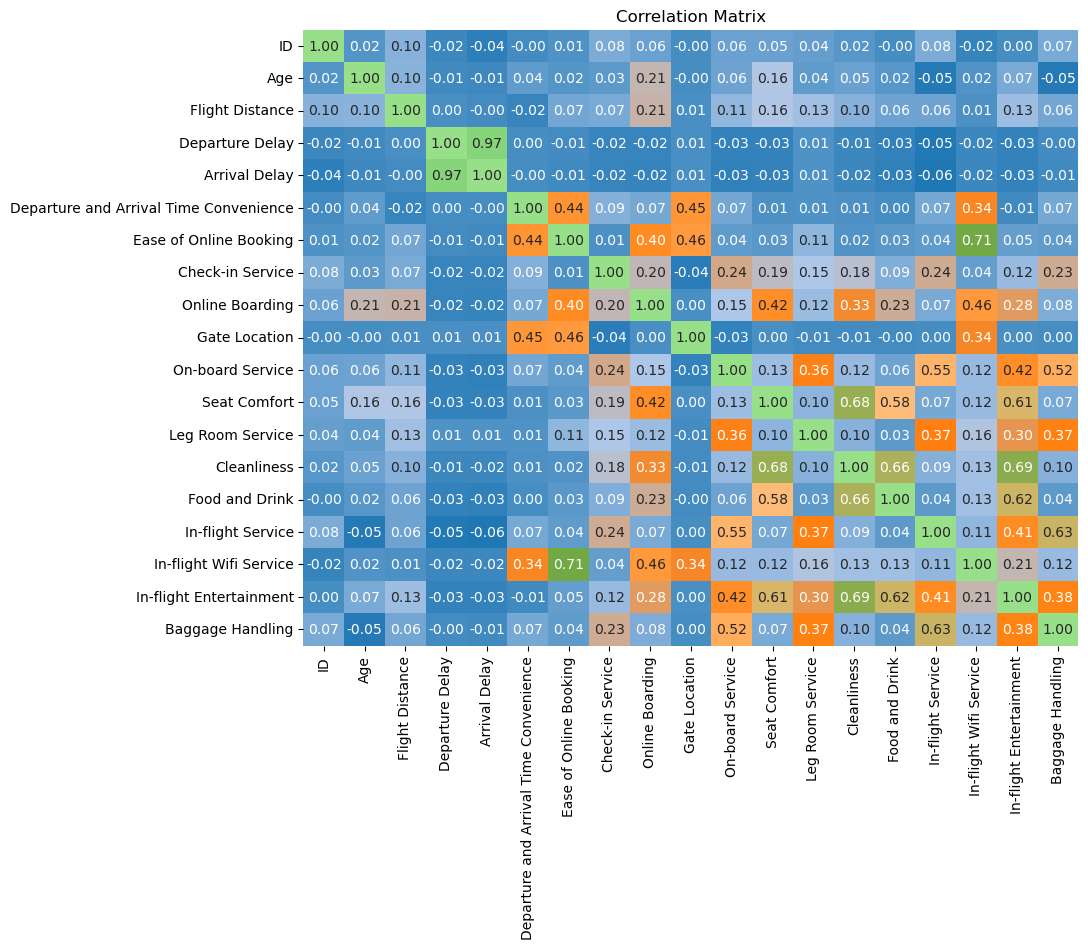

In [34]:
# Correlation matrix table
correlation_matrix = df.corr(numeric_only=True)

# Define a custom colormap
colors = ["#1f77b4", "#aec7e8", "#ff7f0e", "#ffbb78", "#2ca02c", "#98df8a"]
custom_cmap = LinearSegmentedColormap.from_list("custom_cmap", colors)

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap=custom_cmap, fmt=".2f", cbar=False)
plt.title('Correlation Matrix')
plt.show()